## Exploring the Provided Asset Data

In this notebook we will explore the provided asset data and show you how to work with it

You can download the train data here [Google Drive Link](https://drive.google.com/file/d/1ruCDFeUqLEkPDfSLBqDMf8swyU1ECEwq/view?usp=sharing)

In [1]:
## Loading the Data
import pandas as pd

# Read the training and testing data from CSV files
train_df = pd.read_csv('train_data_50.csv') # TODO: make sure that the train_data.csv file is in the same directory as this!

# change date into datetime objects
train_df['Date'] = pd.to_datetime(train_df['Date'])

# set indexes 
train_df.set_index(["Ticker", "Date"], inplace=True)

print(train_df)

                        Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
ZV     2015-07-06  12.884924  13.017960  12.875642  12.994240  11.741812   
       2015-07-07  12.982896  13.009710  12.764262  12.962270  11.712925   
       2015-07-08  12.837485  12.853985  12.637414  12.640508  11.422177   
       2015-07-09  12.772513  12.794170  12.295026  12.382686  11.189203   
       2015-07-10  12.575537  12.772513  12.500253  12.713729  11.488340   
...                      ...        ...        ...        ...        ...   
ZF     2021-04-05  23.637141  23.645392  23.158623  23.307129  20.958649   
       2021-04-06  23.447384  23.736146  23.208125  23.241127  20.899297   
       2021-04-07  23.261752  23.418508  23.199876  23.344255  20.992038   
       2021-04-08  23.071995  23.133873  22.820361  23.100871  20.773174   
       2021-04-09  23.100871  23.282378  22.906988  23.047244  20.724952   

           

We use pandas data-frames to load the data from the CSV as we add the asset "Ticker" and the price "Date" as the index into the Dataframe. This allows us to index the dataframe depending on what asset we want to look at. We can also see that every asset has  *daily* price data for `Open`, `High`, `Low`, `Close`, and `Adj Close`.

In [2]:
# we can see that our dataframe (df) has index values of (Ticker, Date)
train_df.index

MultiIndex([('ZV', '2015-07-06'),
            ('ZV', '2015-07-07'),
            ('ZV', '2015-07-08'),
            ('ZV', '2015-07-09'),
            ('ZV', '2015-07-10'),
            ('ZV', '2015-07-13'),
            ('ZV', '2015-07-14'),
            ('ZV', '2015-07-15'),
            ('ZV', '2015-07-16'),
            ('ZV', '2015-07-17'),
            ...
            ('ZF', '2021-03-26'),
            ('ZF', '2021-03-29'),
            ('ZF', '2021-03-30'),
            ('ZF', '2021-03-31'),
            ('ZF', '2021-04-01'),
            ('ZF', '2021-04-05'),
            ('ZF', '2021-04-06'),
            ('ZF', '2021-04-07'),
            ('ZF', '2021-04-08'),
            ('ZF', '2021-04-09')],
           names=['Ticker', 'Date'], length=72600)

In [3]:
# First let us see what tickers are in the data
tickers = sorted(train_df.index.get_level_values('Ticker').unique())

tickers

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'ZA',
 'ZB',
 'ZC',
 'ZD',
 'ZE',
 'ZF',
 'ZG',
 'ZH',
 'ZI',
 'ZJ',
 'ZK',
 'ZL',
 'ZM',
 'ZN',
 'ZO',
 'ZP',
 'ZQ',
 'ZR',
 'ZS',
 'ZT',
 'ZU',
 'ZV',
 'ZW',
 'ZX']

We can see that there are 50 different assets in the data with names "A" through "ZV".

In [4]:
# We can then find the min,max date range of our data
# Find the maximum and minimum dates
max_date = train_df.index.get_level_values('Date').max()
min_date = train_df.index.get_level_values('Date').min()
print("max date:",max_date)
print("min date:",min_date)

max date: 2021-04-09 00:00:00
min date: 2015-07-06 00:00:00


In [5]:
# If we want to look at the close price data for asset "A"
A_close_data = train_df.loc["A"]["Close"]
A_close_data

Date
2015-07-06    40.509027
2015-07-07    40.806038
2015-07-08    40.331645
2015-07-09    40.591532
2015-07-10    41.057673
                ...    
2021-04-05    67.417415
2021-04-06    67.400917
2021-04-07    67.491671
2021-04-08    67.227661
2021-04-09    66.518134
Name: Close, Length: 1452, dtype: float64

We can see that this data has index of "Date" and the close price data doesn't actually have a column name but can be accessed with `A_close_data.values`

In [6]:
# We can access the dates and close values separately 
# in this case the index of the data has become only the dates column
print("Date index:", A_close_data.index)
print("Close price values:", A_close_data.values)


Date index: DatetimeIndex(['2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
               '2015-07-10', '2015-07-13', '2015-07-14', '2015-07-15',
               '2015-07-16', '2015-07-17',
               ...
               '2021-03-26', '2021-03-29', '2021-03-30', '2021-03-31',
               '2021-04-01', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09'],
              dtype='datetime64[ns]', name='Date', length=1452, freq=None)
Close price values: [40.50902652 40.80603823 40.33164471 ... 67.49167067 67.22766096
 66.5181337 ]


In [7]:
# We can theoretical index into a specific date to get the close price at that date
# not really ideal though
A_close_data.loc[pd.to_datetime('2017-11-09')]

57.89656106082317

In [8]:
# We can also loop through the dates and close prices
for date, close_price in A_close_data.items():
    print(f"Date: {date}, Close Price: {close_price}")

Date: 2015-07-06 00:00:00, Close Price: 40.50902652111918
Date: 2015-07-07 00:00:00, Close Price: 40.80603822632396
Date: 2015-07-08 00:00:00, Close Price: 40.33164470535765
Date: 2015-07-09 00:00:00, Close Price: 40.5915315210338
Date: 2015-07-10 00:00:00, Close Price: 41.05767296838666
Date: 2015-07-13 00:00:00, Close Price: 41.36293359996093
Date: 2015-07-14 00:00:00, Close Price: 41.16080185784699
Date: 2015-07-15 00:00:00, Close Price: 41.424811563085925
Date: 2015-07-16 00:00:00, Close Price: 41.709448305114485
Date: 2015-07-17 00:00:00, Close Price: 41.28455778409696
Date: 2015-07-20 00:00:00, Close Price: 41.40418767354022
Date: 2015-07-21 00:00:00, Close Price: 41.39180956312006
Date: 2015-07-22 00:00:00, Close Price: 41.32580871043231
Date: 2015-07-23 00:00:00, Close Price: 41.3340576368018
Date: 2015-07-24 00:00:00, Close Price: 40.90091818941478
Date: 2015-07-27 00:00:00, Close Price: 40.54202852108502
Date: 2015-07-28 00:00:00, Close Price: 40.84728915265929
Date: 2015-07-

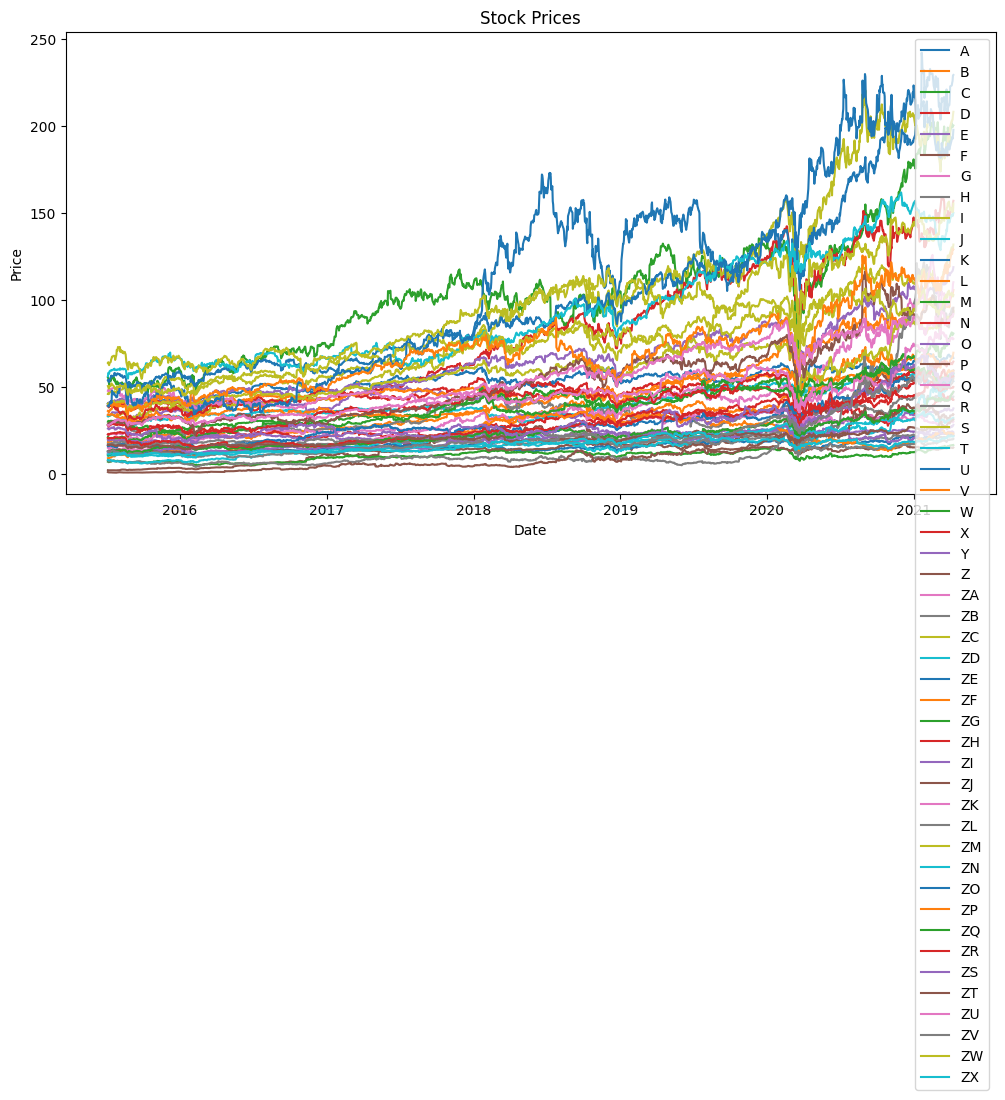

In [9]:
# We can plot all the symbols like below
import matplotlib.pyplot as plt

tickers = sorted(train_df.index.get_level_values('Ticker').unique())

plt.figure(figsize=(12, 6))

for ticker in tickers:
    stock_close_data = train_df.loc[ticker]["Close"]
    plt.plot(stock_close_data.index,stock_close_data.values, label=f'{ticker}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')
plt.legend()
plt.show()

It can also be useful to put the stocks prices into a Numpy array so it is easier to manipulate. Below we will do that with the stock prices. Also note here that we sort the tickers so that the first index will refer to "A", the second to "B" and so on.

In [15]:
import numpy as np

tickers = sorted(train_df.index.get_level_values('Ticker').unique())

close_prices = []

for ticker in tickers:
    stock_close_data = train_df.loc[ticker]["Close"]
    close_prices.append(stock_close_data.values)

close_prices = np.stack(close_prices)


print(f"Tickers {tickers}")
print(f"close_prices shape: {close_prices.shape}") # (50, 1258)
print(f"close_prices:\n{close_prices}")

Tickers ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'ZA', 'ZB', 'ZC', 'ZD', 'ZE', 'ZF', 'ZG', 'ZH', 'ZI', 'ZJ', 'ZK', 'ZL', 'ZM', 'ZN', 'ZO', 'ZP', 'ZQ', 'ZR', 'ZS', 'ZT', 'ZU', 'ZV', 'ZW', 'ZX']
close_prices shape: (50, 1452)
close_prices:
[[ 40.50902652  40.80603823  40.33164471 ...  67.49167067  67.22766096
   66.5181337 ]
 [ 18.31156536  18.2744389   18.24968897 ... 103.08763539 104.46956502
  105.54210799]
 [ 55.3595866   54.79856519  52.82261844 ... 199.02225251 200.26805755
  200.10717044]
 ...
 [ 12.99424007  12.96227037  12.64050795 ...  52.76074048  53.77552837
   54.86456919]
 [ 50.39290206  49.79062657  48.99859746 ... 150.83219461 150.52280794
  155.22959938]
 [ 11.2286732   11.28642591  11.13379481 ...  21.35593062  21.41368254
   21.48793547]]


That is all for the data demo but good luck and happy coding!